<div class = "alert alert-block alert-info">
<font color = black>

## Pandas (derived from Panel data) 
***

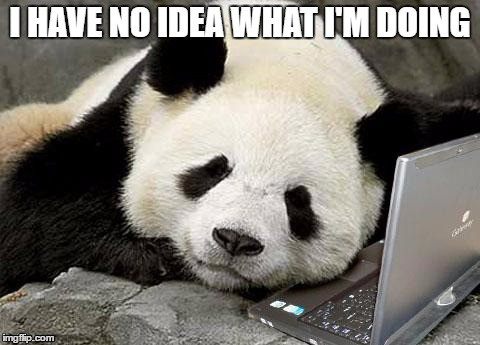

<font color = blue> From "pandas.pydata.org" </font>: "Python has long been great for data munging and preparation, but less so for data analysis and modeling. Pandas helps fills this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R." <br>

- Convert a Python list, dict, or NumPy array into a Pandas data frame
- Open a local file using Pandas (e.g. CSV, EXCEL, TXT files, and etc.) 
- Open a remote file or database through a URL. 

<b> Two main data structures </b>
1. Series
 - Similiar to a one-dimensional array and data can be hetereogenous (unlike NumPy).
2. DataFrame
 - Can be seen as a table of data. It organizes data into rows and columns, making it a two-dimenesional data structure. 
 - Has both a row and column index 

In [108]:
import pandas as pd

## Series

In [109]:
b_w = pd.Series([12, 13 ,14, 'number'])
b_w

0        12
1        13
2        14
3    number
dtype: object

In [110]:
b_w.values

array([12, 13, 14, 'number'], dtype=object)

In [111]:
b_w.index

RangeIndex(start=0, stop=4, step=1)

In [112]:
# create a series with a label
bw2 = pd.Series([1,2,3,4], index = ['a','b','c','d']) 

In [113]:
bw2

a    1
b    2
c    3
d    4
dtype: int64

In [114]:
bw2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [115]:
# Accessing elements through the labeled index
bw2['a']

1

In [116]:
bw2[['a','b','c']]

a    1
b    2
c    3
dtype: int64

In [117]:
# NumPy like functions 
bw2[bw2 > 2]

c    3
d    4
dtype: int64

In [118]:
bw2 * 2

a    2
b    4
c    6
d    8
dtype: int64

In [119]:
# New 
# Creating Series through Dictionary 
dict = {'a': 300, 'b' : 9000, 'c' : 100}
bw3 = pd.Series(dict)
bw3

a     300
b    9000
c     100
dtype: int64

In [120]:
# ordering series the way you want it to. 
bw3order = ['b', 'c', 'd']
bw3_2 = pd.Series(bw3, index = bw3order)
bw3_2
# since 'd' is not part of bw3, it will appear as NaN(Not a Number)
# and 'a' in bw3 will be excluded

b    9000.0
c     100.0
d       NaN
dtype: float64

In [121]:
# You can use 'isnull' and 'notnull' functions in pandas to detect missing data
pd.isnull(bw3_2) # or bw3_2.isnull()

b    False
c    False
d     True
dtype: bool

In [122]:
pd.notnull(bw3_2) # or bw3_2.notnull()

b     True
c     True
d    False
dtype: bool

In [123]:
# Both Series object itself and its index have a name attribute 
bw3_2.name = 'The alphabet'
bw3_2.index.name = 'Numbers'

In [124]:
bw3_2

Numbers
b    9000.0
c     100.0
d       NaN
Name: The alphabet, dtype: float64

## DataFrame

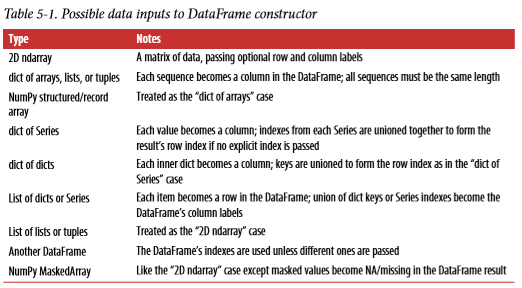

In [125]:
# Creating a DataFrame from a dictionary. 
um = {'Name': ['person1', 'person2', 'person3', 'person4', 'person5', 'person6'],
      'Age' : [21, 12, 13, 25, 8, 70],
      'Height' : [170, 130, 140, 175, 120, 160]}

In [126]:
people = pd.DataFrame(um)
people

,Name,Age,Height
0,person1,21,170
1,person2,12,130
2,person3,13,140
3,person4,25,175
4,person5,8,120
5,person6,70,160


In [127]:
#New
# head method selects only the first five rows. 
people.head()

,Name,Age,Height
0,person1,21,170
1,person2,12,130
2,person3,13,140
3,person4,25,175
4,person5,8,120


In [128]:
# If you specify a sequence of columns, 
# the dataframe's columns will be arranged in that order
people2 = pd.DataFrame(um, columns = ['Age', 'Name', 'Height', 'Debt'])
# Passing a non-existing column will create one that appears as NaN. 
people2

,Age,Name,Height,Debt
0,21,person1,170,NaN
1,12,person2,130,NaN
2,13,person3,140,NaN
3,25,person4,175,NaN
4,8,person5,120,NaN
5,70,person6,160,NaN


In [129]:
#Adding a column to an existing dataframe
people2['ID#'] = [12453, 45245, 55624, 34939, 67857, 92342]
people2

,Age,Name,Height,Debt,ID#
0,21,person1,170,NaN,12453
1,12,person2,130,NaN,45245
2,13,person3,140,NaN,55624
3,25,person4,175,NaN,34939
4,8,person5,120,NaN,67857
5,70,person6,160,NaN,92342


In [130]:
# A column can be retrieved as a Series like so. 
people2['Name'] 
#or people2.Name

0    person1
1    person2
2    person3
3    person4
4    person5
5    person6
Name: Name, dtype: object

In [131]:
# A row can be retrieved by position or name  with 'loc' method
people2.loc[3]

Age            25
Name      person4
Height        175
Debt          NaN
ID#         34939
Name: 3, dtype: object

In [132]:
# This was actually a mistake that I made but it came in handy anyways
debtvalue = pd.Series([10, 11, 13], index = [1, 3, 5])
people2['debt'] = debtvalue

In [133]:
people2

,Age,Name,Height,Debt,ID#,debt
0,21,person1,170,NaN,12453,NaN
1,12,person2,130,NaN,45245,10.0
2,13,person3,140,NaN,55624,NaN
3,25,person4,175,NaN,34939,11.0
4,8,person5,120,NaN,67857,NaN
5,70,person6,160,NaN,92342,13.0


In [134]:
del people2['debt']

In [135]:
# Changing those Debt values so it's not NaN
people2.Debt = [100, 200, 300, 400 ,500 ,600]
people2

,Age,Name,Height,Debt,ID#
0,21,person1,170,100,12453
1,12,person2,130,200,45245
2,13,person3,140,300,55624
3,25,person4,175,400,34939
4,8,person5,120,500,67857
5,70,person6,160,600,92342


In [136]:
# You can tranpose dataframes like you can do in NumPy
people2.T

,0,1,2,3,4,5
Age,21,12,13,25,8,70
Name,person1,person2,person3,person4,person5,person6
Height,170,130,140,175,120,160
Debt,100,200,300,400,500,600
ID#,12453,45245,55624,34939,67857,92342


In [137]:
# Giving index and columns a name. 
people2.index.name = 'Order'; people2.columns.name = 'Description'

In [138]:
people2

Description,Age,Name,Height,Debt,ID#
Order,,,,,
0,21,person1,170,100,12453
1,12,person2,130,200,45245
2,13,person3,140,300,55624
3,25,person4,175,400,34939
4,8,person5,120,500,67857
5,70,person6,160,600,92342


In [139]:
# retrieving the data contained in a dataframe as a ndarray
people2.values

array([[21, 'person1', 170, 100, 12453],
       [12, 'person2', 130, 200, 45245],
       [13, 'person3', 140, 300, 55624],
       [25, 'person4', 175, 400, 34939],
       [8, 'person5', 120, 500, 67857],
       [70, 'person6', 160, 600, 92342]], dtype=object)

In [140]:
#Rearranging the columns
people2 = people2[['ID#', 'Name', 'Age', 'Height', 'Debt']]
people2

Description,ID#,Name,Age,Height,Debt
Order,,,,,
0,12453,person1,21,170,100
1,45245,person2,12,130,200
2,55624,person3,13,140,300
3,34939,person4,25,175,400
4,67857,person5,8,120,500
5,92342,person6,70,160,600


## Essential Functionality 
1. Reindexing
 - Reindexing means to create a new object from an existing index. 
2. Dropping Entries from an Axis 
3. Indexing, Selection, and Filtering 
4. Integer Indexes
5. Arithmetic and Data Alignment 
6. Function Application and Mapping 
7. Sorting and Ranking
8. Axis Indexes with Duplicate Labels 

In [141]:
# Reindexing Series
serexample = pd.Series([1, 2, 3, 4], index = ['b', 'a', 'c', 'd'])
serexample

b    1
a    2
c    3
d    4
dtype: int64

In [142]:
serexample2 = serexample.reindex(['a', 'b', 'c', 'd', 'e'])
serexample2

a    2.0
b    1.0
c    3.0
d    4.0
e    NaN
dtype: float64

In [143]:
# "method" option allows to do certain things like..
# ffill method foward fils the values meaning the new index will contain
# the last value observed in the existing index 
serexample3 = pd.Series([1,2,3], index = [0,2,5])
serexample3 

0    1
2    2
5    3
dtype: int64

In [144]:
serexample4 = serexample3.reindex([0,1,2,3,4,5], method ='ffill')
serexample4
# another method "bfill" backward fills the values

0    1
1    1
2    2
3    2
4    2
5    3
dtype: int64

In [145]:
# Reindexing DataFrame: can alter either the index (row), columns, or both. 
import numpy as np
dfexample1 = pd.DataFrame(np.arange(9). reshape((3,3)), 
                         index=['a','c','d'],
                         columns = ['Ohio', 'Texas', 'California'])
dfexample1

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [146]:
dfexample2 = dfexample1.reindex(['a','b','c','d'])
dfexample2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [147]:
# Reindexing Columns (with the columns keyword)
states = ['Texas', 'Utah', 'California']
dfexample2.reindex(columns = states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


## Dropping Entries from an Axis 

In [148]:
#Dropping an axis from Series
drexample = pd.Series(np.arange(5.), index = ['a','b','c','d', 'e'])
drexample

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [149]:
drexample2 = drexample.drop('c')
drexample2

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [150]:
drexample2

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [151]:
# Dropping an axis from Data Frame
dfdrexample = pd.DataFrame(np.arange(16).reshape((4,4)),
                          index=['Ohio','Colorado','Utah','New York'],
                          columns=['one','two','three','four'])
dfdrexample

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [152]:
dfdrexample.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [153]:
dfdrexample.drop('four',axis=1)

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [154]:
dfdrexample.drop(['one','four'],axis='columns')

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10
New York,13,14


In [155]:
# With "in-place" it destroys the data that is dropped
dfdrexample.drop('Ohio', inplace=True)
dfdrexample

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [156]:
dfdrexample

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Indexing, Selection, and Filtering 
Series indexing works analogously to NumPy array indexing, except you can use the Serie's index values instead of only integers.

In [157]:
serindex = pd.Series(np.arange(4.), index=['a','b','c','d'])
serindex

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [158]:
serindex['b']

1.0

In [159]:
serindex[1]

1.0

In [160]:
serindex[serindex < 2]

a    0.0
b    1.0
dtype: float64

In [161]:
# Slicing with labels behaves differently than normal Python slicing
# in that the end-point is inclusive.
serindex['b':'c']

b    1.0
c    2.0
dtype: float64

In [162]:
# See that slicing with integers doesn't produce the same result. 
serindex[1:2]

b    1.0
dtype: float64

In [163]:
serindex['b':'c'] = 5 
serindex

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence. 

In [164]:
dfindex =  pd.DataFrame(np.arange(16).reshape((4, 4)),
                        index=['Ohio', 'Colorado', 'Utah', 'New York'],
                        columns=['one', 'two', 'three', 'four'])
dfindex

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [165]:
dfindex['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [166]:
dfindex[['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [216]:
dfindex[:2]

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7


In [168]:
dfindex < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [169]:
dfindex[dfindex < 5] = 0
dfindex

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [170]:
# DataFrame label-indexing on the rows 
# axis lael (loc)
dfindex.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [171]:
dfindex.loc['Colorado']

one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [217]:
dfindex.loc[:'Utah', 'two']

Utah         9
New York    13
Name: two, dtype: int32

In [173]:
#integers (iloc)
dfindex.iloc[1, [0,1,3]]

one     0
two     5
four    7
Name: Colorado, dtype: int32

In [174]:
dfindex.iloc[1]

one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [175]:
dfindex.iloc[:3, 1]

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

## Arithmetic and Data Alignment

In [176]:
# Adding series 
plus1 =  pd.Series([7, -2, 3, 1], index=['a', 'c', 'd', 'e'])
plus1

a    7
c   -2
d    3
e    1
dtype: int64

In [177]:
plus2 =  pd.Series([-2, 3, -1, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
plus2

a   -2.0
c    3.0
e   -1.0
f    4.0
g    3.1
dtype: float64

In [178]:
plus1 + plus2 

a    5.0
c    1.0
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Any index in one index but not the other will come up as NaN. 

In [179]:
# Adding DataFrames, alignment is performed on both the rows and the columns. 
dfplus1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                       index=['Ohio', 'Texas', 'Colorado'])
dfplus1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [180]:
dfplus2 =  pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                        index=['Utah', 'Ohio', 'Texas', 'Oregon'])
dfplus2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [181]:
dfplus1 + dfplus2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Since 'c' and 'e' columns are not found in both DataFrames, they appear as all missing in the result. The same holds true for the rows. 

---

If you add DataFrames with no cloumn or row labels in common, the result will contain all nulls

In [182]:
df1 = pd.DataFrame({'A': [1, 2]})

In [183]:
df2 = pd.DataFrame({'B': [3, 4]})

In [184]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


To avoid getting nulls, fill in the value, like 0. 

In [185]:
dffill1 =pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
dffill1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [186]:
dffill2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))
dffill2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [187]:
dffill1.add(dffill2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [188]:
### Operations between DataFrame and Series 
dfop =  pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
dfop

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [189]:
serop = dfop.iloc[0] 
serop

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [190]:
dfop - serop
# The subtraction is performed once for each row.
# This is referred to as broadcasting. 

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


## Sorting and Ranking
Sorting a dataset is another imporatnt built-in operation. <br>
To sort alphabetically by row or column index, use the <b> sort_index method </b> <br>
To sort by values, use <b> sort_values method </b>

In [191]:
#Series 
sersort = pd.Series(range(4), index = ['d','a', 'c', 'b'])
sersort

d    0
a    1
c    2
b    3
dtype: int64

In [192]:
sersort.sort_index()

a    1
b    3
c    2
d    0
dtype: int64

In [193]:
sersort2 = pd.Series((2,3,5,1,7), index = list('abcde'))
sersort2

a    2
b    3
c    5
d    1
e    7
dtype: int64

In [194]:
sersort2.sort_values()

d    1
a    2
b    3
c    5
e    7
dtype: int64

In [195]:
#DataFrame 
dfsort = pd.DataFrame(np.arange(8).reshape((2, 4)), 
                      index=['three', 'one'], 
                      columns=['d', 'a', 'b', 'c'])
dfsort

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [196]:
dfsort.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [197]:
dfsort.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [198]:
dfsort.sort_index(axis=1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [199]:
# With DataFrame you need to pass one or more column names 
#to the by option of sort_values
dfsort2 = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
dfsort2

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [200]:
dfsort2.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [201]:
dfsort2.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


#### Ranking
The book's explanation on ranking is confusing so 
[better example](http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/)

## Axis Indexes with Duplicate Labels 
While many pandas functions require that the labels be unique, it's not mandatory. 

In [202]:
duplab = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
duplab

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [203]:
# is_unique property tells you whether the labels are unique or not. 
duplab.index.is_unique

False

In [204]:
# Indexing a label with multiple entries returns a Series
duplab['a']

a    0
a    1
dtype: int64

The same logic extends to indexing rows in a DataFrame

## Summarizing and Computing Descriptive Stats

In [205]:
dfstats = pd.DataFrame(np.arange(8).reshape((4, 2)), 
                      index=['a','b','c','d'], 
                      columns=['one','two'])
dfstats

,one,two
a,0,1
b,2,3
c,4,5
d,6,7


In [206]:
# Returns the sum of the columns
dfstats.sum()

one    12
two    16
dtype: int64

In [207]:
# Returns the sum of rows (across the columns)
dfstats.sum(axis='columns')

a     1
b     5
c     9
d    13
dtype: int64

In [208]:
# Returns the index where maximum values lie
dfstats.idxmax()

one    d
two    d
dtype: object

In [209]:
# Returns the index where minimum values lie
dfstats.idxmin()

one    a
two    a
dtype: object

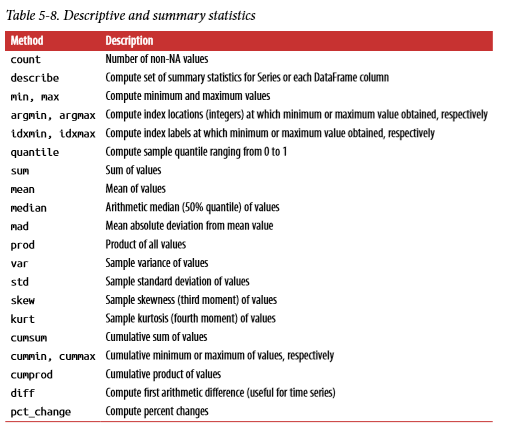

### Unique Values, Value Counts, and Membership

In [210]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c']) 

In [211]:
# Returns unique values in the Series object
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [212]:
# If you prefer it in alphabetical order. 
uniques.sort()
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

In [213]:
# Returns the frequencies of the values in the Series 
obj.value_counts()
# sorted by value in descending order as default

c    3
a    3
b    2
d    1
dtype: int64